In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import VGG16

In [2]:
model=tf.keras.models.load_model('gender_model.h5')

In [3]:
layer=model.get_layer('dense_5')

In [4]:
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
def infer_the_yolo(image):
    model = YOLO("yolov8n.pt")
    return model(image)


In [5]:
orignal_image=load_image('vk.webp')
image=orignal_image.copy()
model_results=infer_the_yolo(image)
boxes=model_results[0].boxes


0: 480x640 3 persons, 177.9ms
Speed: 7.2ms preprocess, 177.9ms inference, 12.0ms postprocess per image at shape (1, 3, 480, 640)


In [6]:

def pad_to_square(image, target_size=224):
    h, w, _ = image.shape
    max_dim = max(h, w)
    pad_h = (max_dim - h) // 2
    pad_w = (max_dim - w) // 2
    padded_image = cv2.copyMakeBorder(image, pad_h, max_dim - h - pad_h, pad_w, max_dim - w - pad_w, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    return cv2.resize(padded_image, (target_size, target_size))


In [7]:
def get_label(croped_image):
    paded_image=pad_to_square(croped_image)
    paded_image=tf.expand_dims(paded_image,axis=0)
    op=model(paded_image)
    predicted_class = int(op.numpy()[0][0])
    if predicted_class==0:
        return "Male"
    else:
        return "Female"

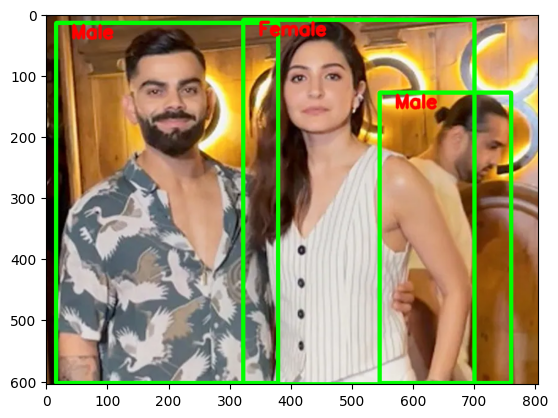

In [8]:
def plot_box(boxes,image):
    cropped_images=[]
    for i,box in enumerate(boxes):
        x_min, y_min, x_max, y_max=np.array(box.xyxy.view(-1).tolist()).astype(int)
        cropped_image=image[y_min:y_max+1,x_min:x_max+1]
        plt.imshow(cropped_image)
        cropped_image=np.array(cropped_image)
        padded_image=pad_to_square(cropped_image)
        label=get_label(padded_image)
        color = (0, 255, 0)
        thickness = 5
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
        cv2.putText(image, label, (x_min + 25, y_min + 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3, cv2.LINE_AA)


    plt.imshow(image)
        
    return cropped_images

croped_images=plot_box(boxes,image)